## Reading Excel files

This notebook demonstrates how to read and manipulate data from
Excel using [Pandas](http://pandas.pydata.org/):

* Input / Output
* summaries
* plotting

First, import the Pandas library:


[clean_data]: https://github.com/tanyaschlusser/stats-via-python/raw/master/notebooks/data/14intaba_cleaned.xls

In [1]:
# The library for handling tabular data is called 'pandas'
# Everyone shortens this to 'pd' for convenience.
import pandas as pd

## Get IRS data on businesses

The IRS website has some [aggregated statistics on business returns][irs] in Excel files. We will use the [Selected Income and Tax Items for Selected Years][intaba14].

The original data is from the file linked here:
https://www.irs.gov/pub/irs-soi/14intaba.xls,
but I cleaned it up by hand to remove footnotes and reformat the column and row headers. You can get the cleaned file in this repository [data/14intaba_cleaned.xls][cleaned-data].
It looks like this:

<img src="img/screenshot-14intaba.png" width="100%"/>

[cleaned-data]: https://github.com/tanyaschlusser/stats-via-python/raw/master/notebooks/data/14intaba_cleaned.xls
[irs]: https://www.irs.gov/uac/soi-tax-stats-integrated-business-data
[intaba14]: https://www.irs.gov/uac/soi-tax-stats-individual-time-series-statistical-tables#_grp4

###  Read the data!

We will use the `read_excel` function inside of the Pandas library (accessed using `pd.read_excel`) to get the data. We need to:

- skip the first 2 rows
- Split out the 'Current dollars' and 'Constant 1990 dollars' subsets
- use the left two columns to split out the number of returns and their dollar amounts

When referring to files on your computer from Jupyer, the path you use is relative to the current Jupyter notebook. My directory looks like this:

```
.
|-- notebooks
  |-- input_output.ipynb
  |-- data
    |- 14intaba_cleaned.xls
```

so, the relative path from the notebook `input_output.ipynb` to the dataset `14intaba_cleaned.xls` is:

```
data/14intaba_cleaned.xls
```

In [2]:
raw = pd.read_excel('data/14intaba_cleaned.xls', skiprows=2)

### Look at the last 3 rows

The function `pd.read_excel` returns an object called a 'Data Frame', that is defined inside of the Pandas library. It has associated functions that access and manipulate the data inside. For example:

In [3]:
# Look at the last 3 rows
raw.tail(3)

,Variable,Units,Current dollars 1990,Current dollars 1991,Current dollars 1992,Current dollars 1993,Current dollars 1994,Current dollars 1995,Current dollars 1996,Current dollars 1997,...,Constant 1990 dollars 2006,Constant 1990 dollars 2007,Constant 1990 dollars 2008,Constant 1990 dollars 2009,Constant 1990 dollars 2010,Constant 1990 dollars 2011,Constant 1990 dollars 2012,Constant 1990 dollars 2013,Constant 1990 dollars 2014,"Percent change, 2013 to 2014.1"
221,Tax due at time of filing,Amount (thousand USD),56561150.0,53046236.0,50411381.0,50330900.0,60507961.0,71153015.0,85337201.0,93909641.0,...,8.190006e+07,8.235046e+07,6.088502e+07,5.248614e+07,6.042705e+07,6.131351e+07,7.163618e+07,7.769037e+07,8.623847e+07,11.0028
222,Predetermined estimated tax penalty,Number of returns,3792027.0,3798637.0,4555184.0,4972115.0,4707696.0,5177201.0,5530812.0,5920839.0,...,6.496924e+06,7.549807e+06,6.355582e+06,6.548380e+06,6.670019e+06,6.702687e+06,7.619267e+06,8.543611e+06,9.327132e+06,9.17084
223,Predetermined estimated tax penalty,Amount (thousand USD),636676.0,596943.0,581476.0,626890.0,705246.0,856106.0,955207.0,1080062.0,...,1.148484e+06,1.180518e+06,7.425282e+05,5.239647e+05,4.830977e+05,4.463376e+05,4.781212e+05,5.715477e+05,6.497465e+05,13.6819


### Split out the 'Current dollars' and 'Constant 1990 dollars'

There are two sets of data — for the actual dollars for each variable, and also for constant dollars (accounting for inflation). We will split the raw dataset into two and then index the rows by the units (whether they're number of returns or amount paid/claimed).

The columns we care about are `Variable`, `Units`, and the current or constant dollars from each year. (You can view them all with `raw.columns`.)
We can subset the dataset with the columns we want using `raw.ix[:, <desired_cols>]`.

There are a lot of commands in this section...we will do a better job explaining later. For now, `['braces', 'denote', 'a list']`, you can add lists, and you can write a shorthand for loop inside of a list (that's called a "list comprehension"). 

In [4]:
index_cols = ['Units', 'Variable']
current_dollars_cols = index_cols + [
    c for c in raw.columns if c.startswith('Current')
]
constant_dollars_cols = index_cols + [
    c for c in raw.columns if c.startswith('Constant')
]

current_dollars_data = raw[current_dollars_cols][9:]
current_dollars_data.set_index(keys=index_cols, inplace=True)

constant_dollars_data = raw[constant_dollars_cols][9:]
constant_dollars_data.set_index(keys=index_cols, inplace=True)

In [5]:
years = [int(c[-4:]) for c in constant_dollars_data.columns]
constant_dollars_data.columns = years

## Statistics

Pandas provides methods for statistical summaries. The `describe` method gives an overall summary. `dropna(axis=1)` deletes columns containing null values. If it were `axis=0` it would be deleting rows. 

In [6]:
per_entry = (
    constant_dollars_data.transpose()['Amount (thousand USD)'] * 1000 /
    constant_dollars_data.transpose()['Number of returns']
)
per_entry.dropna(axis=1).describe().round()

Variable,Additional taxes,Alimony paid adjustment,Alimony received,Alternative minimum tax,Basic standard deduction,Business or profession net income less loss,Child care credit,Credit for elderly or disabled,Deductible part of self-employment tax,Earned income credit,...,Total credits (including all not enumerated in this table),Total income,Total itemized deductions,Total payments,Total pensions and annuities (not in income),Total social security benefits (not in income),Total statutory adjustments,Total tax liability (including all not enumerated in this table),Total taxpayer IRA adjustment,Unemployment compensation
count,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
mean,4310.0,9151.0,10668.0,4291.0,4300.0,8424.0,347.0,130.0,883.0,1183.0,...,775.0,34259.0,14749.0,5784.0,16409.0,10494.0,2012.0,6164.0,2108.0,2682.0
std,2814.0,1156.0,1378.0,947.0,220.0,888.0,31.0,46.0,37.0,194.0,...,93.0,2931.0,1027.0,612.0,2493.0,657.0,89.0,748.0,420.0,809.0
min,658.0,7553.0,8317.0,2607.0,3980.0,6752.0,305.0,63.0,820.0,598.0,...,549.0,29288.0,13184.0,4643.0,11941.0,9252.0,1868.0,4796.0,1585.0,1893.0
25%,1707.0,7910.0,9208.0,3698.0,4113.0,7516.0,322.0,88.0,847.0,1234.0,...,695.0,31720.0,13815.0,5443.0,13902.0,9940.0,1931.0,5755.0,1713.0,2077.0
50%,4198.0,9282.0,11129.0,4404.0,4196.0,8628.0,346.0,120.0,891.0,1249.0,...,765.0,34596.0,14649.0,5865.0,17196.0,10546.0,2025.0,6162.0,2079.0,2433.0
75%,5994.0,10185.0,11862.0,4905.0,4490.0,9059.0,362.0,164.0,914.0,1299.0,...,855.0,36366.0,15467.0,6224.0,18287.0,10885.0,2083.0,6736.0,2516.0,3033.0
max,9889.0,10725.0,12745.0,6285.0,4685.0,9662.0,415.0,199.0,933.0,1335.0,...,901.0,38961.0,16668.0,6733.0,20000.0,11590.0,2180.0,7408.0,2698.0,4827.0


## Plot

The library that provides plot functions is called [Matplotlib](http://matplotlib.org/). To show the plots in this notebook you need to use the "magic method" `%matplotlib inline`. It should be used at the beginning of the notebook for clarity.

In [7]:
# This should always be at the beginning of the notebook,
# like all magic statements and import statements.
# It's only here because I didn't want to describe it earlier.
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 12)

### The per-entry data
The data are (I think) for every form filed, not really per capita, but since we're not interpreting it for anything important we can conflate the two.

Per capita income (Blue line) rose a lot with the tech bubble, then sunk with its crash, and then followed the housing bubble and crash. It also looks like small business income (Red dashed line) hasn't really come back since the crash, but that unemployment (Magenta dots) has gone down.

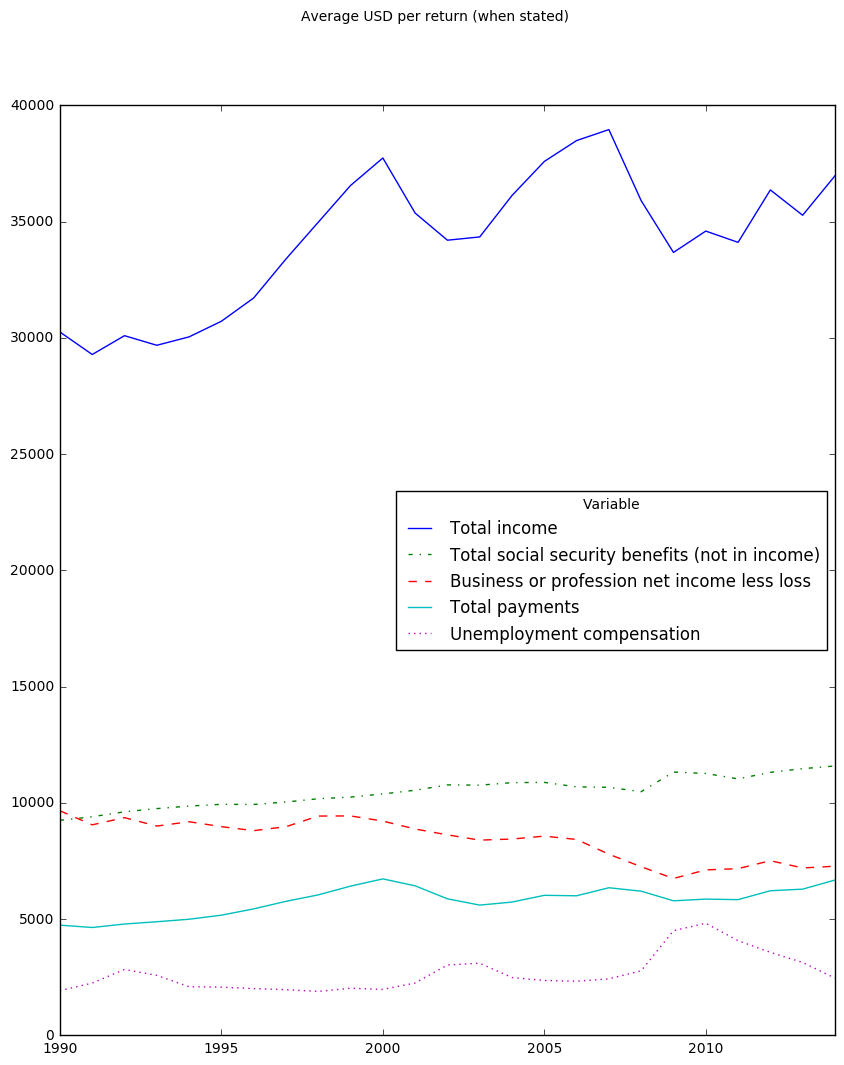

In [8]:
styles = ['b-', 'g-.', 'r--', 'c-', 'm:']
axes = per_entry[[
        'Total income',
        'Total social security benefits (not in income)',
        'Business or profession net income less loss',
        'Total payments',
        'Unemployment compensation']].plot(style=styles)
plt.suptitle('Average USD per return (when stated)')

### Also with log-y
We can see the total social security benefits payout (Green dot dash) increase as the baby boomers come of age, and we see the unemployment compensation (Magenta dots) spike after the 2008 crisis and then fall off.

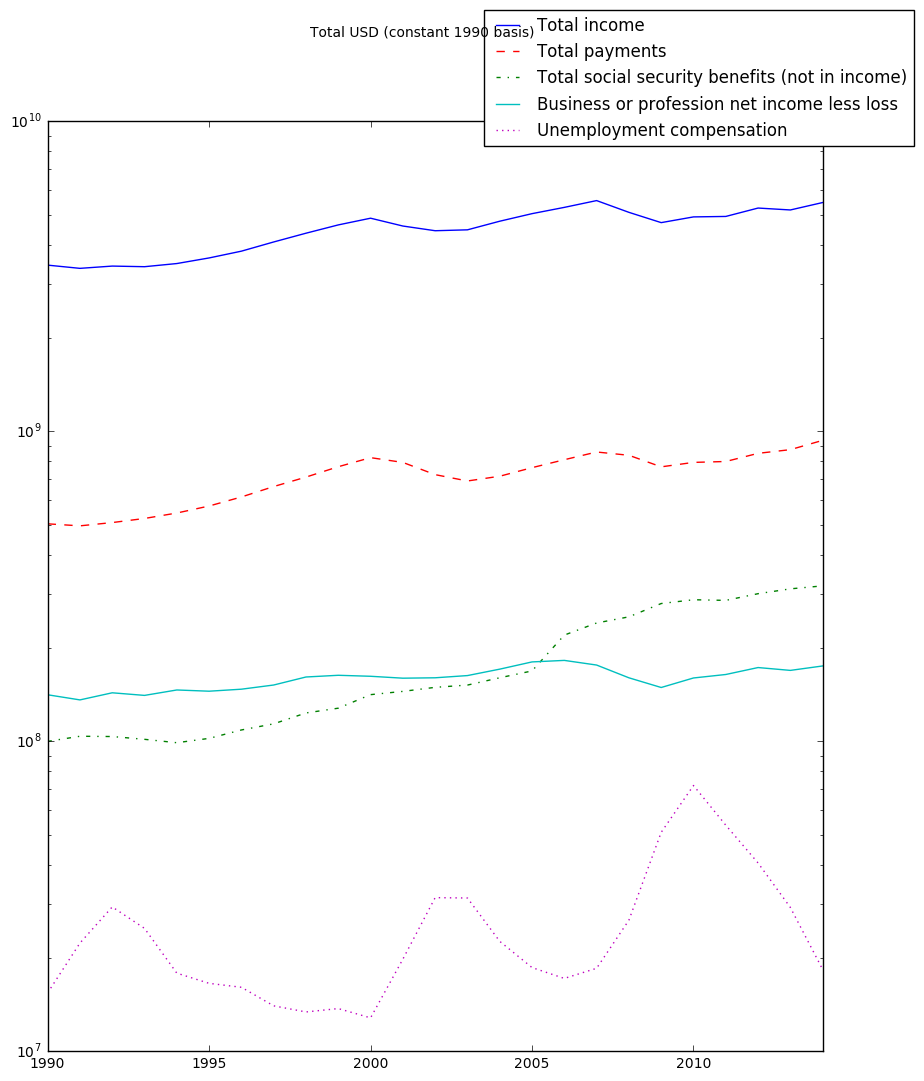

In [9]:
styles = ['b-', 'r--', 'g-.', 'c-', 'm:']
axes = constant_dollars_data.transpose()['Amount (thousand USD)'][[
        'Total income',
        'Total payments',
        'Total social security benefits (not in income)',
        'Business or profession net income less loss',
        'Unemployment compensation']].plot(logy=True, style=styles)
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.suptitle('Total USD (constant 1990 basis)')

## We did it!

That was I/O with a little statistical summarization and plotting. ❤ Yay.